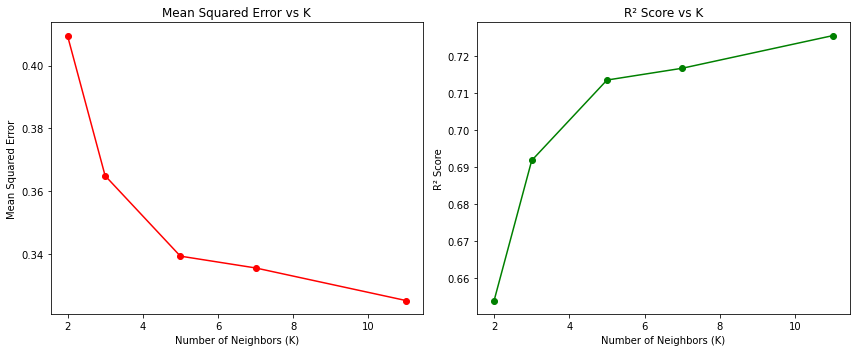

Best K (based on R² Score): 11
R² Score at Best K: 0.7254105313935328


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = fetch_california_housing()
X = data.data[:5000]  # Using only first 5000 rows to reduce memory load
y = data.target[:5000]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define selected k values
k_values = [2, 3, 5, 7, 11]
mse_scores = []
r2_scores = []

# Train and evaluate for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))

# Plot MSE and R² Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.title('Mean Squared Error vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_scores, marker='o', color='green')
plt.title('R² Score vs K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

# Print best K based on R²
best_k = k_values[r2_scores.index(max(r2_scores))]
print(f'Best K (based on R² Score): {best_k}')
print(f'R² Score at Best K: {max(r2_scores)}')